In [1]:
#Importing relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [2]:
#importing dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Loading Dataset
file_path = '/content/drive/MyDrive/household_power_consumption.txt'

In [7]:
df = pd.read_csv(file_path, sep=';')
df.head()

<ipython-input-7-7f98ab244e4f>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [8]:
#Checking shape of data
df.shape

(2075259, 9)

In [9]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.drop(['Date', 'Time'],axis=1, inplace=True)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [10]:
df.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
Datetime                     0
dtype: int64

In [11]:
df.count()

Global_active_power      2075259
Global_reactive_power    2075259
Voltage                  2075259
Global_intensity         2075259
Sub_metering_1           2075259
Sub_metering_2           2075259
Sub_metering_3           2049280
Datetime                 2075259
dtype: int64

In [12]:
df[df=='?'].count()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3               0
Datetime                     0
dtype: int64

In [14]:
columns = df.columns
columns = columns.drop('Datetime')
columns


Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [15]:
df[columns] = df[columns].apply(pd.to_numeric, errors='coerce')


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [18]:
dff = df[columns].fillna(method='ffill')
dff['Datetime'] = df['Datetime']
dff.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
dtype: int64

In [19]:
df1 = dff[['Datetime','Global_active_power']]

In [20]:
df1.set_index('Datetime', inplace=True)
df_hourly = df1.resample('H').sum()


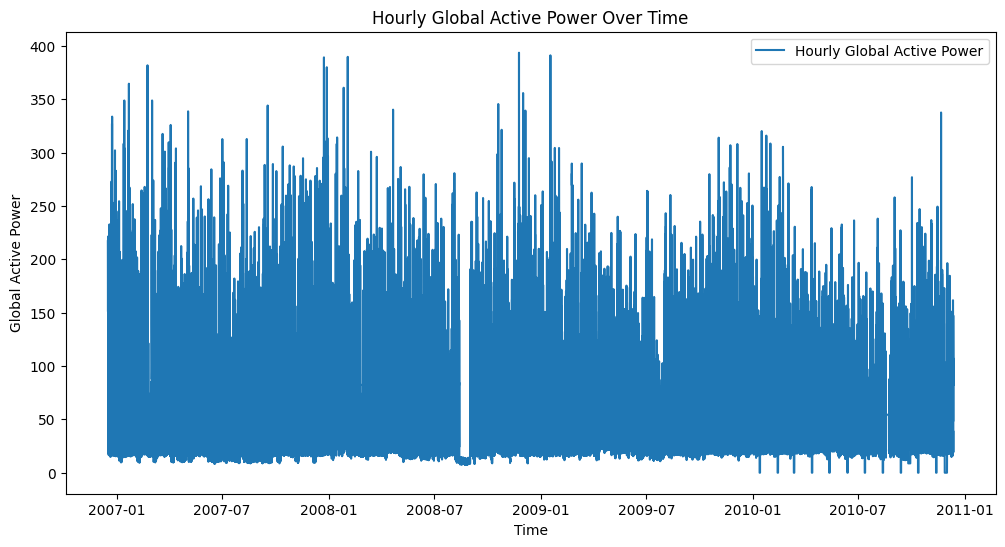

In [21]:
#QUESTION 11


plt.figure(figsize=(12, 6))
plt.plot(df_hourly.index, df_hourly['Global_active_power'], label='Hourly Global Active Power')
plt.title('Hourly Global Active Power Over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power')
plt.legend()
plt.show()

In [22]:
#QUESTION 12


# Calculating Pearson correlation coefficient
correlation_coefficient = dff['Global_active_power'].corr(dff['Voltage'])

#to 3 decimal places
print(f"Pearson correlation coefficient: {correlation_coefficient:.3f}")


Pearson correlation coefficient: -0.396


In [23]:
#QUESTION 13

correlation_coef2 = dff['Voltage'].corr(dff['Global_intensity'])

print(f"Pearson correlation coefficient: {correlation_coef2:.2f}")

Pearson correlation coefficient: -0.41


In [24]:
df2 = dff.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [27]:
df_daily = df1.resample('D').sum()
df_daily.head()


,Global_active_power
Datetime,
2006-12-16,1209.176
2006-12-17,3390.460
2006-12-18,2203.826
2006-12-19,1666.194
2006-12-20,2225.748


In [28]:
x = len(df_daily)
train = df_daily.iloc[:-300]
test = df_daily.iloc[-300:]
print(x)
print(train.shape)
print(test.shape)

1457
(1157, 1)
(300, 1)


In [31]:
trained_prophet = train.reset_index().rename(columns={'Datetime': 'ds', 'Global_active_power': 'y'})



In [32]:
trained_prophet.head()

,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [33]:
#model using Facebook Prophet

model = Prophet()
model.fit(train_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj2vjon37/a6s2odh1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj2vjon37/s7044467.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1400', 'data', 'file=/tmp/tmpj2vjon37/a6s2odh1.json', 'init=/tmp/tmpj2vjon37/s7044467.json', 'output', 'file=/tmp/tmpj2vjon37/prophet_modelqglrpber/prophet_model-20231204153425.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:34:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:34:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [35]:
# Predictions for the test set

future = pd.DataFrame(data={'ds': test.index})
forecast = model.predict(future)

# Extracting predictions made
test_predictions = forecast['yhat']

In [36]:
test_predictions

0      1328.260426
1      1402.610945
2      1346.032249
3      1249.443634
4      1277.917361
          ...     
295    1744.705164
296    1720.814492
297    1655.596732
298    1713.723774
299    1915.270522
Name: yhat, Length: 300, dtype: float64

In [38]:
# QUESTION 14

from sklearn.metrics import mean_absolute_error

#  Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_error(test['Global_active_power'], test_predictions) / test['Global_active_power'].mean() * 100

# MAPE to 2 decimal places
print(f"MAPE: {mape:.2f}%")


MAPE: 29.53%


In [39]:
#QUESTION 15

from sklearn.metrics import mean_squared_error

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(test['Global_active_power'], test_predictions))

# Print the RMSE to 2 decimal places
print(f"RMSE: {rmse:.2f}")

RMSE: 576.49


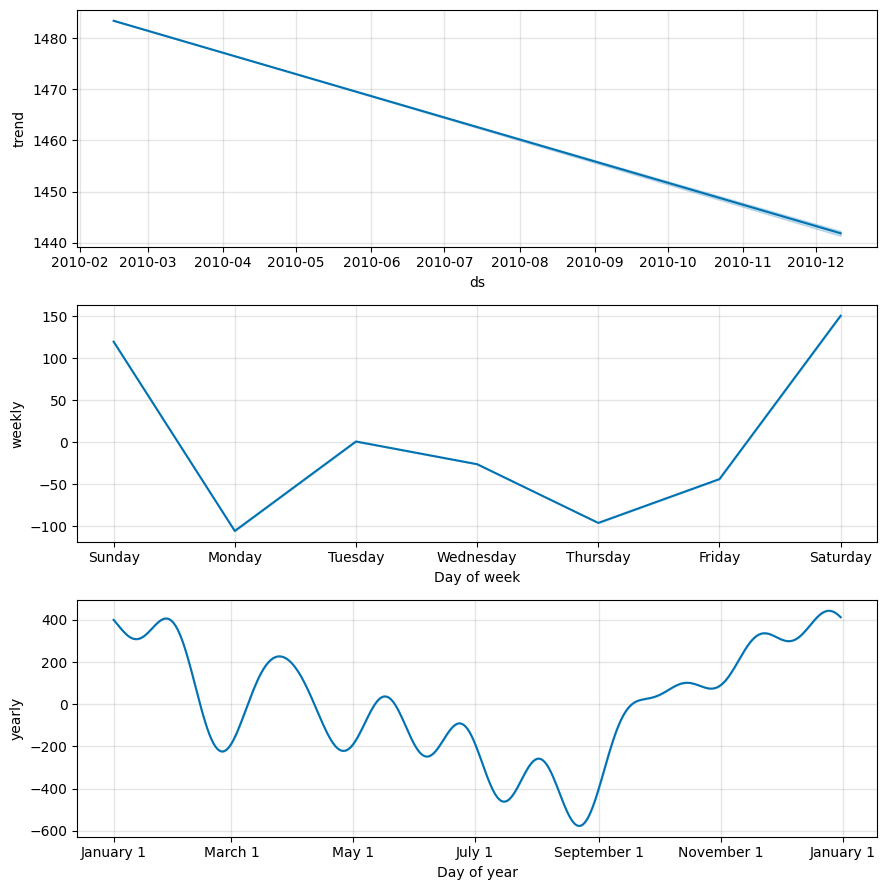

In [40]:
fig = model.plot_components(forecast)
plt.show()


In [41]:
df2.set_index('Datetime', inplace=True)


In [42]:
df_dailyy = df2.resample('D').sum()
df_dailyy.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [43]:
dfff = df_dailyy.reset_index().rename(columns={'Datetime': 'ds',
                                               'Global_active_power': 'y',
                                               'Global_reactive_power':'add1',
                                               'Voltage':'add2','Global_intensity':'add3',
                                               'Sub_metering_1':'add4',
                                               'Sub_metering_2':'add5',
                                               'Sub_metering_3':'add6'})
dfff.head()

,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [62]:
x1 = len(dfff)
train1 = dfff.iloc[:-300]
test1 = dfff.iloc[-300:]
print(x1)
print(train1.shape)
print(test1.shape)

1457
(1157, 8)
(300, 8)


In [64]:
trained_prophet1 = train1.copy()



In [65]:
trained_prophet1.head()

,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [66]:
dfff.head()

,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [67]:
x2 = len(dfff)
train2 = dfff.iloc[:-300]
test2 = dfff.iloc[-300:]
print(x2)
print(train2.shape)
print(test2.shape)


1457
(1157, 8)
(300, 8)


In [69]:
# Train the model using Facebook Prophet
model2 = Prophet()
model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')
model2.add_regressor('add4')
model2.add_regressor('add5')
model2.add_regressor('add6')
model2.fit(trained_prophet1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj2vjon37/pvfxlpn3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj2vjon37/w1fx5z20.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50221', 'data', 'file=/tmp/tmpj2vjon37/pvfxlpn3.json', 'init=/tmp/tmpj2vjon37/w1fx5z20.json', 'output', 'file=/tmp/tmpj2vjon37/prophet_model75eo8hef/prophet_model-20231204160353.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:03:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:03:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [70]:
# Step 6: Make predictions for the test set
future2 = pd.DataFrame(data={'ds': test2['ds']})
future2['add1'] = test2['add1'] # Populate with the future values of 'Global_reactive_power'
future2['add2'] = test2['add2']  # Populate with the future values of 'Voltage'
future2['add3'] = test2['add3']  # Populate with the future values of 'Global_intensity'
future2['add4'] = test2['add4']  # Populate with the future values of 'Sub_metering_1'
future2['add5'] = test2['add5'] # Populate with the future values of 'Sub_metering_2'
future2['add6'] = test2['add6']  # Populate with the future values of 'Sub_metering_3'

forecast2 = model2.predict(future2)


In [71]:
# Extract predictions for the test set
test_predictions2 = forecast2['yhat']

In [72]:
test_predictions2

0      2107.292606
1      1797.890417
2      2064.851247
3      1760.469277
4      1970.948093
          ...     
295    1132.719851
296     552.474791
297    1632.436604
298    1618.004935
299    1886.822379
Name: yhat, Length: 300, dtype: float64

In [75]:
# QUESTION 17



from sklearn.metrics import mean_absolute_error
# Mean Absolute Percentage Error (MAPE)
mape2 = mean_absolute_error(test2['y'], test_predictions2) / test2['y'].mean() * 100

# MAPE to 2 decimal places
print(f"MAPE of multivariate: {mape2:.2f}%")


MAPE of multivariate: 1.02%


In [76]:
#QUESTION 18

from sklearn.metrics import mean_squared_error

# Root Mean Squared Error (RMSE)
rmse2 = np.sqrt(mean_squared_error(test2['y'], test_predictions2))

# RMSE to 2 decimal places
print(f"RMSE: {rmse2:.2f}")

RMSE: 18.50


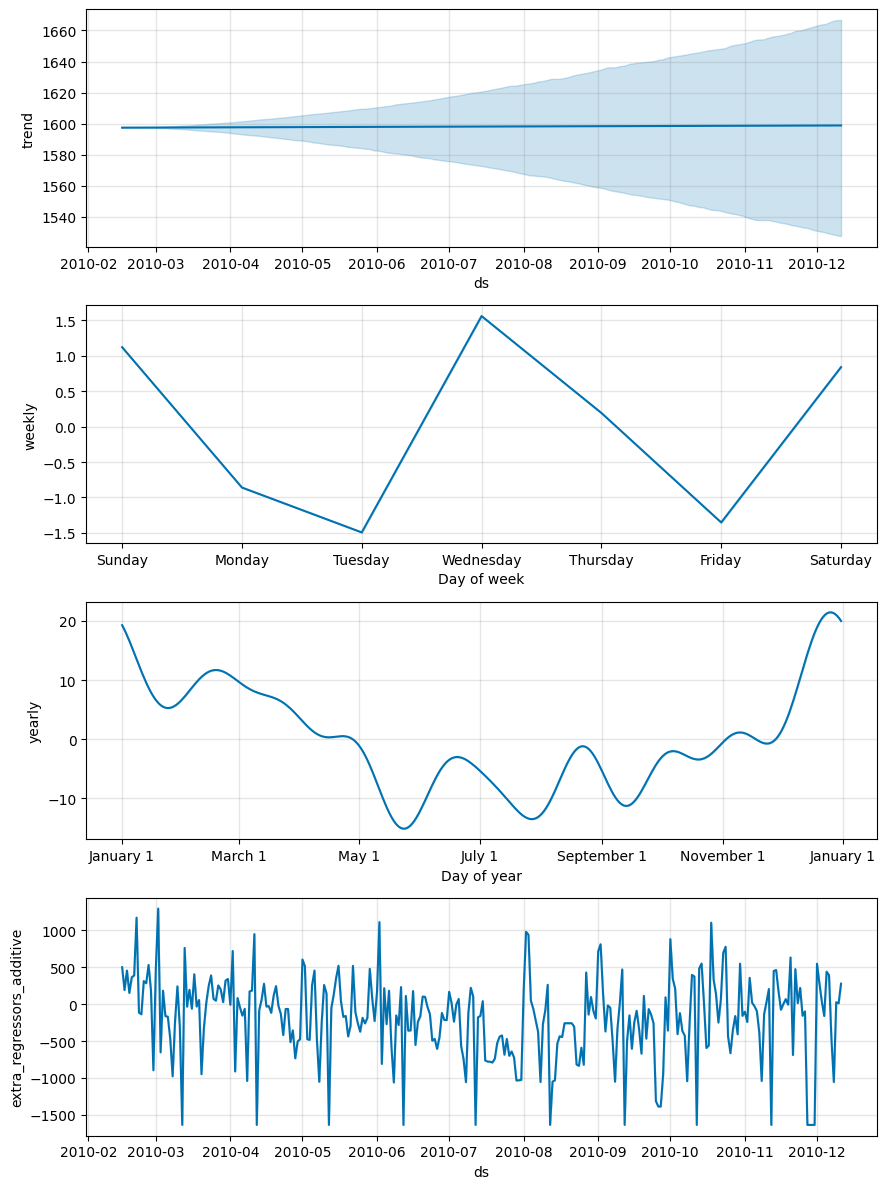

In [77]:
# QUESTION 19 AND 20



fig2 = model2.plot_components(forecast2)
plt.show()


In [ ]:
#From the component plot above, of the multivariate forecasted model, the day of the daily seasonality with the lowest value is TuesdayS
#Question 20: If you plot the components from the forecasted model, what month of the yearly seasonality has the lowest value? May